In [2]:
# libraries importing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# additional modules
import sys
sys.path.append('../utils')

## Data loading

In [81]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk("../data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [146]:
# datasets with anomalies loading
list_of_df = [pd.read_csv(file, 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file]
# anomaly-free df loading
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0], 
                            sep=';', 
                            index_col='datetime', 
                            parse_dates=True)

## Data description and visualization

In [147]:
# dataset characteristics printing
print(f'A number of datasets in the SKAB v0.9: {len(list_of_df)}\n')
print(f'Shape of the random dataset: {list_of_df[0].shape}\n')
n_cp = sum([len(df[df.changepoint==1.]) for df in list_of_df])
n_outlier = sum([len(df[df.anomaly==1.]) for df in list_of_df])
print(f'A number of changepoints in the SKAB v0.9: {n_cp}\n')
print(f'A number of outliers in the SKAB v0.9: {n_outlier}\n')
print(f'Head of the random dataset:')
display(list_of_df[0].head(15))

A number of datasets in the SKAB v0.9: 34

Shape of the random dataset: (1154, 10)

A number of changepoints in the SKAB v0.9: 129

A number of outliers in the SKAB v0.9: 13067

Head of the random dataset:


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 12:14:36,0.027429,0.040353,0.770310,0.382638,71.2129,25.0827,219.789,32.0000,0.0,0.0
2020-03-09 12:14:37,0.027269,0.040226,1.096960,0.710565,71.4284,25.0863,233.117,32.0104,0.0,0.0
2020-03-09 12:14:38,0.027040,0.039773,1.140150,0.054711,71.3468,25.0874,234.745,32.0000,0.0,0.0
2020-03-09 12:14:39,0.027563,0.040313,1.108680,-0.273216,71.3258,25.0897,205.254,32.0104,0.0,0.0
2020-03-09 12:14:41,0.026570,0.039566,0.704404,0.382638,71.2725,25.0831,212.095,33.0000,0.0,0.0
2020-03-09 12:14:42,0.027767,0.039232,0.705707,0.054711,71.4228,25.0741,209.007,32.9899,0.0,0.0
2020-03-09 12:14:43,0.027297,0.040935,0.735473,0.382638,71.2527,25.0764,230.678,32.0000,0.0,0.0
2020-03-09 12:14:44,0.026947,0.039732,1.232370,0.382638,71.3556,25.0776,239.917,32.0000,0.0,0.0
2020-03-09 12:14:45,0.026732,0.039107,1.129350,0.054711,71.4070,25.0800,234.287,32.0000,0.0,0.0


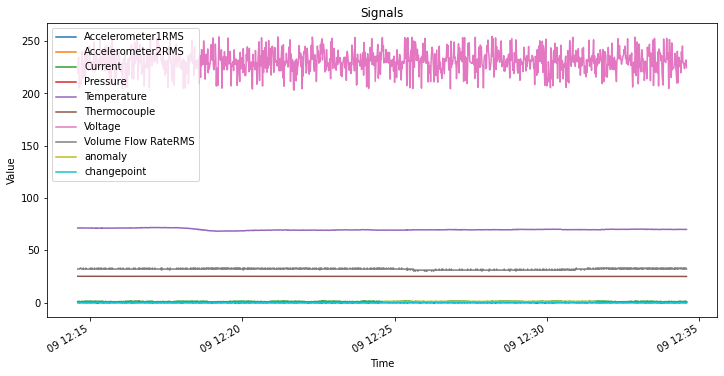

In [148]:
# random dataset visualizing
list_of_df[0].plot(figsize=(12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals')
plt.show()

In [150]:
# Выберем для демонстрации рандомный датасет (1ый)
X_train_ = list_of_df[0][:400].drop(['anomaly', 'changepoint'], axis=1)
X_test_ = list_of_df[0].drop(['anomaly','changepoint'], axis=1)

In [151]:
from sklearn.preprocessing import StandardScaler

# обучение скейлера
StSc = StandardScaler()
StSc.fit(X_train)
X_train = StSc.transform(X_train_)
X_test = StSc.transform(X_test_)

In [ ]:
# выбор и инициализация архитектуры автоэнкодера
input_dots = Input((8,))
x = Dense(5)(input_dots)
x = Activation('relu')(x)
bottleneck = Dense(2, activation='linear')(x)
x = Dense(5)(bottleneck)
x = Activation('relu')(x)
out = Dense(8, activation='linear')(x)

model = Model(input_dots, out)
model.compile(optimizer=Adam(0.005), loss='mae')

In [ ]:
# обучение модели
model.fit(X_train_scaled, 
          X_train_scaled,
          epochs=40,
          batch_size=32,
          shuffle=True
         )

In [ ]:
# определение UCL (верхнего контрольного предела)
residuals = pd.DataFrame(X_train_scaled - 
                         model.predict(X_train_scaled))
UCL = residuals.abs().sum(axis=1).quantile(0.99) # quantile for UCL

In [ ]:
# реализация алгоритма поиска точек изменения состояния
residuals = pd.DataFrame(X_test_scaled - 
                         model.predict(X_test_scaled))
criterion = residuals.abs().sum(axis=1)

prediction = pd.Series((criterion > UCL).astype(int).values, 
                       index=df.index
                      ).fillna(0)
prediction_cp = abs(prediction.diff())

# Ruptures

In [ ]:
import ruptures as rpt

In [ ]:
# выбор функции потерь
c = rpt.cost.CostL2()

In [ ]:
# выбор алгоритма поиска
algo = rpt.Binseg(custom_cost=с, jump=1)

In [ ]:
# обучение алгоритма
algo.fit(signal)

In [ ]:
# детектирование точек изменения состояния
# ограничение - информация о кол-ве точек
my_bkps = algo.predict(n_bkps=4)

# Grad boosting

In [15]:
import numpy as np

In [153]:
X_train_tr = pd.concat([pd.DataFrame(X_train_splitted[i], 
                        columns=X_train_.columns).assign(**{'id':i}) for i in range(len(X_train_splitted))])

In [152]:
# Нарезка временных рядов окном
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
X_train_splitted, y = split_sequences(X_train, 10)

In [154]:
# преобразование окон в таблицу
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters

extraction_settings = MinimalFCParameters()

del extraction_settings["length"]
del extraction_settings["sum_values"]
del extraction_settings["absolute_maximum"]
del extraction_settings["root_mean_square"]
del extraction_settings["variance"]

X = extract_features(X_train_tr, 
                     column_id='id',
                     default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 25/25 [00:02<00:00,  9.46it/s]


In [155]:
X.head()

,Accelerometer1RMS__median,Accelerometer1RMS__mean,Accelerometer1RMS__standard_deviation,Accelerometer1RMS__maximum,Accelerometer1RMS__minimum,Accelerometer2RMS__median,Accelerometer2RMS__mean,Accelerometer2RMS__standard_deviation,Accelerometer2RMS__maximum,Accelerometer2RMS__minimum,...,Voltage__median,Voltage__mean,Voltage__standard_deviation,Voltage__maximum,Voltage__minimum,Volume Flow RateRMS__median,Volume Flow RateRMS__mean,Volume Flow RateRMS__standard_deviation,Volume Flow RateRMS__maximum,Volume Flow RateRMS__minimum
0,-0.210296,-0.377697,0.888386,0.966984,-1.94647,-0.468233,-0.501086,0.388325,0.204388,-1.110368,...,-0.441528,-0.618710,1.119851,0.937120,-2.317423,-0.602973,-0.174753,0.862164,1.560417,-0.614281
1,-0.210296,-0.355944,0.903414,0.966984,-1.94647,-0.468233,-0.506896,0.384407,0.204388,-1.110368,...,-0.042069,-0.538818,1.121669,0.937120,-2.317423,-0.591664,0.040521,0.985481,1.560417,-0.614281
2,-0.489378,-0.452759,0.937489,0.966984,-1.94647,-0.645907,-0.621244,0.468403,0.204388,-1.449033,...,-0.738881,-0.701081,1.106038,0.937120,-2.317423,-0.602973,0.038259,0.986954,1.560417,-0.614281
3,0.092266,-0.327963,0.965290,0.966984,-1.94647,-0.466687,-0.559472,0.502543,0.204388,-1.449033,...,-0.738881,-0.748787,1.064815,0.937120,-2.317423,-0.602973,0.038259,0.986954,1.560417,-0.614281
4,-0.118810,-0.381176,0.933945,0.966984,-1.94647,-0.466687,-0.560385,0.501975,0.204388,-1.449033,...,-0.089672,-0.409211,1.051805,1.078332,-1.965051,-0.614281,0.035997,0.988420,1.560417,-0.614281


In [156]:
# !pip install xgboost

In [157]:
# обучение градбустинга
from xgboost import XGBRegressor

xgb = XGBRegressor(verbosity=0)
xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [158]:
xgb.score(X, y)

0.9999772174427064

In [159]:
# определение UCL (верхнего контрольного предела)
residuals = pd.DataFrame(y - xgb.predict(X))
UCL = residuals.abs().sum(axis=1).quantile(0.99) # quantile for UCL

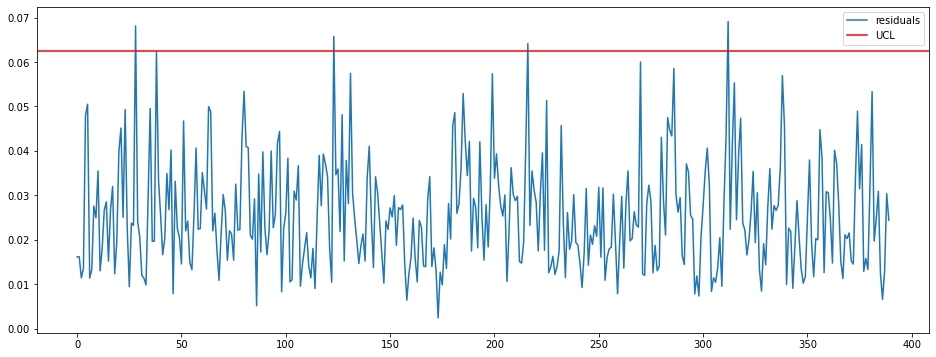

In [160]:
residuals.abs().sum(axis=1).plot(label='residuals', figsize=(16,6))
plt.axhline(UCL, color='r', label='UCL')
plt.legend();

## Results

In [164]:
X_test_splitted, y_test = split_sequences(X_test, 10)

X_test_tr = pd.concat([pd.DataFrame(X_test_splitted[i], 
                        columns=X_test_.columns).assign(**{'id':i}) 
                       for i in range(len(X_test_splitted))])

X_test_final = extract_features(X_test_tr, 
                                 column_id='id',
                                 default_fc_parameters=extraction_settings)

results = xgb.predict(X_test_final)

Feature Extraction: 100%|██████████| 25/25 [00:02<00:00, 10.24it/s]


In [169]:
residuals = pd.DataFrame(y_test).drop(6, axis=1) - pd.DataFrame(results).drop(6, axis=1)
# residuals = y_test - results
residuals = pd.DataFrame(residuals).abs().sum(axis=1)

<AxesSubplot:>

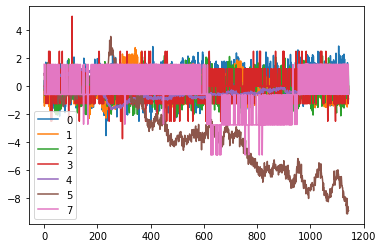

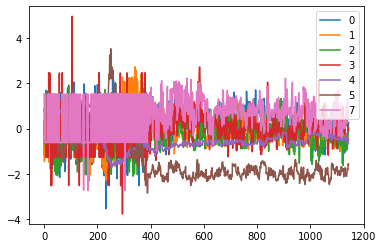

In [171]:
pd.DataFrame(y_test).drop(6, axis=1).plot()
pd.DataFrame(results).drop(6, axis=1).plot()

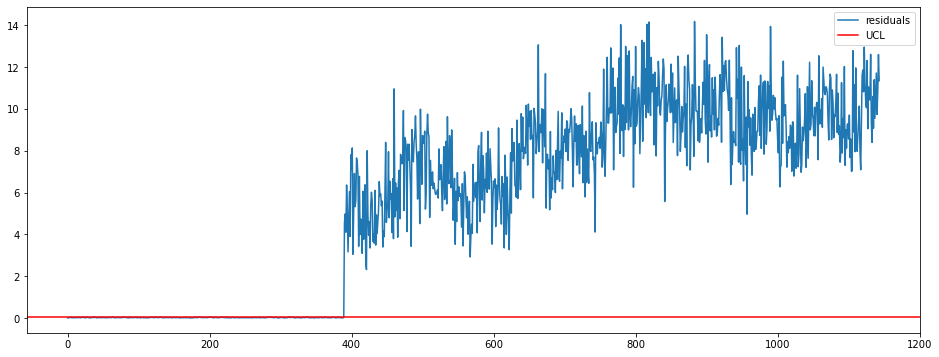

In [170]:
residuals.plot(label='residuals', figsize=(16,6))
plt.axhline(UCL, color='r', label='UCL')
plt.legend();

In [135]:
# predicted outliers saving
predicted_outlier = pd.Series((residuals > UCL).astype(int).values).fillna(0)

# predicted CPs saving
prediction_cp = abs(predicted_outlier.diff())
prediction_cp[0] = predicted_outlier[0]

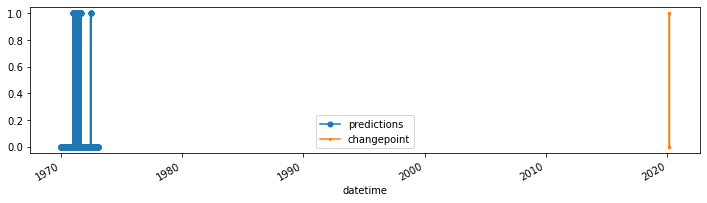

In [137]:
prediction_cp.plot(figsize=(12, 3), label='predictions', marker='o', markersize=5)
list_of_df[0].changepoint.plot(marker='o', markersize=2)
plt.legend();